In [19]:
#Read the text
library(tm)
library(wordcloud)
library(RColorBrewer)
library(stringi)
library(knitr)
library(textstem)
library(rvest)
library(tidyverse)
library(stringr)

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Warning message:
"package 'textstem' was built under R version 3.6.3"Loading required package: koRpus.lang.en
Warning message:
"package 'koRpus.lang.en' was built under R version 3.6.3"Loading required package: koRpus
Warning message:
"package 'koRpus' was built under R version 3.6.3"Loading required package: sylly
Warning message:
"package 'sylly' was built under R version 3.6.3"For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()


Attaching package: 'koRpus'

The following object is masked from 'package:readr':

    tokenize



### Search keyword - "nursing informatics faculty", indeed.com

In [38]:
#function to extract titles and university from the indeed
nursing_informatics_extractor <- function (url){
    nursing_inf.page = url
    nursing_inf = read_html(nursing_inf.page)
    title = nursing_inf %>% 
              rvest::html_nodes('body') %>% 
              xml2::xml_find_all("//div[contains(@class, 'title')]") %>% 
              rvest::html_text()
    university = nursing_inf %>% 
              rvest::html_nodes('body') %>% 
              xml2::xml_find_all("//div[contains(@class, 'sjcl')]") %>% 
              rvest::html_text()
    duties  = nursing_inf %>%
              rvest::html_nodes('body') %>% 
              xml2::xml_find_all("//div[contains(@class, 'summary')]") %>% 
              rvest::html_text()
    job_table = data.frame(title,university,duties)
    return(job_table)
}

In [39]:
table <- nursing_informatics_extractor("https://www.indeed.com/jobs?q=nursing%20informatics%20faculty&l&vjk=71d769c79964160e")
table1 <-nursing_informatics_extractor("https://www.indeed.com/jobs?q=nursing+informatics+faculty&limit=50&radius=100&start=50")
table2 <-nursing_informatics_extractor("https://www.indeed.com/jobs?q=nursing+informatics+faculty&limit=50&radius=100&start=100")
table3 <-nursing_informatics_extractor("https://www.indeed.com/jobs?q=nursing+informatics+faculty&limit=50&radius=100&start=150")

In [97]:
combined_table <- do.call(rbind,list(table,table1,table2,table3))

In [41]:
dim(combined_table)

[1] 178   3

In [81]:
combined_table$title <- as.character(combined_table$title)
combined_table$university <- as.character(combined_table$university)
combined_table$duties <- as.character(combined_table$duties)

In [44]:
table2

title,university,duties
Clinical Informatics Nurse,"WellSpan Health 3.7 York, PA 17403","General Summary: Under the general supervision of the Director-Clinical Informatics and IT Education, works collaboratively with users of clinical…"
"Assistant Dean, Undergraduate Programs","Resurrection University 2.9 Chicago, IL 60622 (Wicker Park area)","Resurrection University (www.ResU.edu), is accepting nominations and applications for the position of Assistant Dean for Undergraduate Programs, in the…"
"Clinical Asst., Assoc, Professor - Population Health","University of Wisconsin–Madison 4.5 Madison, WI 53705",*POSITION SUMMARY: * The clinical faculty member hired under this position vacancy listing (PVL) will have an A basis (12 month annual year) appointment and…
"Clinical Asst., Assoc., Professor - Health Systems Innovatio...","University of Wisconsin–Madison 4.5 Madison, WI 53705",*POSITION SUMMARY: * The clinical faculty member hired under this position vacancy listing (PVL) will have A basis (12 month) appointment and be responsible…
Clinical Informationist,"Emory 3.9 Decatur, GA 30030","Description: Position Summary The Clinical Informationist works with a user-oriented, embedded team of Clinical Informationists to develop and deliver…"
Research Track Faculty of Pharmacoepidemiology (Extramurally...,"Rutgers University 4.2 New Brunswick, NJ",Position Details Position Information Recruitment/Posting Title Research Track Faculty of Pharmacoepidemiology (Extramurally Funded; Associate or Full…
Faculty Clinician Investigator/Rank DOQ,"University of Utah 4.2 Salt Lake City, UT 84112 (East Bench area)",The Division of General Internal Medicine at the University of Utah and the VA Salt Lake City Health Care System (VASLCHCS) are recruiting a women’s health…
Field Service Engineer III,"BJC HealthCare 3.9 St. Louis, MO 63110 (Botanical Heights area)",Additional Job Information 40 Hours per Week - Benefits Eligible - Job ID: 1189848 Employment Status: Full-Time More Information: Barnes-Jewish Hospital at…
Department of Global and Community Health - Tenured or Tenur...,"George Mason University 4.2 Fairfax, VA 22030","Multiple Open-Rank Biostatistics, Epidemiology and Behavioral Science Faculty Positions The College of Health and Human Services at George Mason University…"
"Associate Director, Antibiotic Stewardship","UT Southwestern 3.9 Dallas, TX 75390 (Near East area)","The University of Texas Southwestern Medical Center, Department of Internal Medicine, Division of Infectious Diseases & Geographic Medicine, is seeking…"


In [82]:
combined_table$title <- gsub("\n", " ", combined_table$title)
combined_table$university <-gsub("\n", " ", combined_table$university)
combined_table$duties <-gsub("\n", " ", combined_table$duties)

In [83]:
str(combined_table)

'data.frame':	178 obs. of  3 variables:
 $ title     : chr  "  Clinical Informatics Nurse  " "  Clinical Asst., Assoc, Professor - Population Health  " "  Clinical Asst., Assoc., Professor - Health Systems Innovatio...  " "  Director of Professional Practice and Education - Roslindale...  " ...
 $ university: chr  "    WellSpan Health     3.7      York, PA 17403 " "    University of Wisconsin–Madison     4.5      Madison, WI 53705 " "    University of Wisconsin–Madison     4.5      Madison, WI 53705 " "   Hebrew SeniorLife     Roslindale, MA 02131 " ...
 $ duties    : chr  " 3 years experience in clinical nursing.  5 Participates in computer training and orientation activities for cu"| __truncated__ " Clinical faculty pursue scholarly activities individually or in scholarship teams that advance nursing science"| __truncated__ " Clinical faculty pursue scholarly activities individually or in scholarship teams that advance nursing science"| __truncated__ " In partnership with the Chief N

In [98]:
combined_table <-combined_table %>% filter(str_detect(title, fixed(c("Professor","Faculty"),ignore_case = TRUE)))

In [77]:
combined_table <-combined_table %>% filter(str_detect(university, 'University|College'))

In [103]:
combined_table

title,university,duties
"Clinical Asst., Assoc., Professor - Health Systems Innovatio...","University of Wisconsin–Madison 4.5 Madison, WI 53705","Clinical faculty pursue scholarly activities individually or in scholarship teams that advance nursing science, education, or practice."
Adjunct Faculty Nursing Program,"Olivet College 4.2 Olivet, MI 49076","We are seeking candidates with specializations in content areas such as community health, diversity, health informatics, pharmacology, pathophysiology, and/or…"
"Clinical Assistant/Associate/Full Professor, College of Nurs...","University of Arizona 4.3 Phoenix, AZ 85032 (Paradise Valley area)",Experience with simulation in nursing education. Recent direct or indirect nursing practice experience. Maintain certification in advanced nursing specialty …
PT Faculty - School of Nursing - MSN CBE Program (Virtual),Laureate Education 3.6 United States,"A minimum of two years experience teaching graduate courses in one of the three specialty areas (nursing education, nurse executive, and nursing informatics) or…"
"Faculty, Contributing - DNP/PHD (Virtual)",Laureate Education 3.6 United States • Remote work available,Contributing nursing faculty members will also work with other contributing and full time faculty as well as administrators in the College.
Part Time Faculty Health Informatics,"College of Coastal Georgia 4.3 Brunswick, GA 31520",The College of Coastal Georgia (CCGA) seeks qualified applicants for the Part-Time Faculty in the area of Health Informatics.
Professor with Tenure - PhD or DNSc in Nursing,"Merritt Hawkins 3.1 Orange, CA 92868","Candidates applying for this senate faculty position are expected to be stellar nurse researchers who are doctorally-prepared (e.g. PhD in nursing, DNSc,…"
"Clinical Asst., Assoc, Professor - Population Health","University of Wisconsin–Madison 4.5 Madison, WI 53705",*POSITION SUMMARY: * The clinical faculty member hired under this position vacancy listing (PVL) will have an A basis (12 month annual year) appointment and…
"Assistant/Associate Professor, Nursing - 6461","Northern Illinois University 4.1 DeKalb, IL 60115","The School of Nursing, in the College of Health and Human Sciences at Northern Illinois University, invites applications for an anticipated tenure-track…"
Part Time Faculty Criminal Justice,"College of Coastal Georgia 4.3 Brunswick, GA 31520",Nature of Work The College of Coastal Georgia (CCGA) seeks qualified applicants for the Part-Time Faculty in the area of Criminal Justice. This is an…


In [79]:
write.csv(combined_table,"faculty_list.csv")

In [49]:
getwd()

[1] "C:/Users/bolua/OneDrive/Documents/R programming"

In [51]:
txt <- read.csv("faculty_list.csv", header=TRUE, sep =",", stringsAsFactors = FALSE)

In [52]:
head(txt)

X,title,university,duties
1,Clinical Informatics Nurse,"WellSpan Health3.7York, PA 17403","3 years experience in clinical nursing. 5 Participates in computer training and orientation activities for current and in-coming personnel, students and faculty…"
2,"Clinical Asst., Assoc, Professor - Population Health","University of Wisconsin–Madison4.5Madison, WI 53705","Clinical faculty pursue scholarly activities individually or in scholarship teams that advance nursing science, education, or practice."
3,"Clinical Asst., Assoc., Professor - Health Systems Innovatio...","University of Wisconsin–Madison4.5Madison, WI 53705","Clinical faculty pursue scholarly activities individually or in scholarship teams that advance nursing science, education, or practice."
4,Director of Professional Practice and Education - Roslindale...,"Hebrew SeniorLifeRoslindale, MA 02131","In partnership with the Chief Nursing Officer, formulate nursing education programming, consistent with current nursing education standards, evidence based…"
5,"Part-Time Nursing Faculty, Health Informatics","Columbus State University4.2Columbus, GA 31907",This is a non-tenure track faculty position in the School of Nursing within the College of Education and Health Professions.
6,Adjunct Faculty Nursing Program,"Olivet College4.2Olivet, MI 49076","We are seeking candidates with specializations in content areas such as community health, diversity, health informatics, pharmacology, pathophysiology, and/or…"


In [67]:
# Combine the jobs together to form a corpus
modi_data <- Corpus(VectorSource(unique(txt$duties)))

# create list to clean the corpus from junk words
dropwords <- c("and","the","our","that","for","job","postion","are","also","more","has","must","have","should","this", "with","needs","basic","year", "state", "pay", "gender")
dropwords <- c( dropwords, "less", "will", "may", "well", "within", "andor", "insure", "work", "working", "worked", "company","role" )
dropwords <- c( dropwords, "info", "jobabout", "project", "position", "years", "able", "life", "site", "strong", "issues", "duties" )
dropwords <- c( dropwords, "career", "required", "ability", "staff", "ensure")

In [68]:
#Clean the data
modi_data<-tm_map(modi_data,stripWhitespace)
modi_data<-tm_map(modi_data,tolower)
modi_data<-tm_map(modi_data,removeNumbers)
modi_data<-tm_map(modi_data,removePunctuation)
modi_data<-tm_map(modi_data,removeWords, stopwords('english'))
modi_data<-tm_map(modi_data, removeWords, dropwords )

Warning message in tm_map.SimpleCorpus(modi_data, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(modi_data, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(modi_data, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(modi_data, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(modi_data, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(modi_data, removeWords, dropwords):
"transformation drops documents"

health department university    nursing    faculty    college     school 
        55         43         41         39         38         38         25 
    nature   medicine  professor  assistant     campus 
        23         20         20         19         19

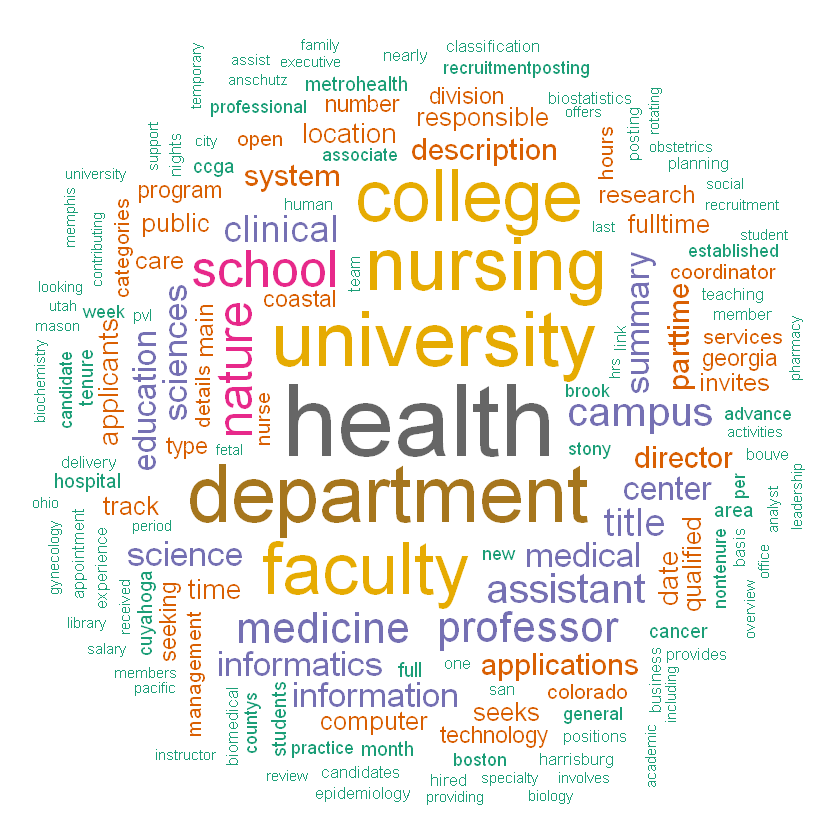

In [69]:
#Make term document Matrix
tdm_modi<-TermDocumentMatrix(modi_data) #Creates a TDM
TDM1<-as.matrix(tdm_modi) #Convert this into a matrix format
v = sort(rowSums(TDM1), decreasing = TRUE) #Gives you the frequencies for every word
head(v, 12)
#findFreqTerms(tdm_modi, lowfreq=c(2))

## Plot WordCloud
cloud3 <- wordcloud(modi_data, scale=c(5,0.5), max.words=200, random.order=FALSE, rot.per=0.35, use.r.layout=FALSE, colors=brewer.pal(8, "Dark2"))
